In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-suicide-mortality-data-2000-2021/world_suicide_rates.csv


# **Adquisición de la información**

In [2]:
# Obtenemos la información
data= pd.read_csv('/kaggle/input/world-suicide-mortality-data-2000-2021/world_suicide_rates.csv')

# **Análisis exploratorio de datos**

In [3]:
# Visualizamos las primeras filas
data.head()

,Country Name,Country Code,Year,Suicide Rate
0,Afghanistan,AFG,2000,4.36
1,Afghanistan,AFG,2001,4.38
2,Afghanistan,AFG,2002,4.26
3,Afghanistan,AFG,2003,4.24
4,Afghanistan,AFG,2004,4.23


In [4]:
# Detalle de Tabla
print('Filas: ', data.shape[0])
print('Columnas: ',data.shape[1])

Filas:  5126
Columnas:  4


In [5]:
# Agrupamos la data por código de país
mean_rate_country=data.groupby(['Country Code'])['Suicide Rate'].agg('mean')
mean_rate_country

Country Code
AFE     7.749892
AFG     3.811364
AFW     5.680154
AGO     7.584545
ALB     4.985909
         ...    
WSM    11.781818
YEM     5.026364
ZAF    17.635455
ZMB     6.061818
ZWE    14.312273
Name: Suicide Rate, Length: 233, dtype: float64

In [6]:
# Agrupamos por código y nombre de país -> Validación de diferente nombre pero mismo código
mean_rate_country=data.groupby(['Country Code','Country Name'])['Suicide Rate'].agg('mean')
mean_rate_country

Country Code  Country Name               
AFE           Africa Eastern and Southern     7.749892
AFG           Afghanistan                     3.811364
AFW           Africa Western and Central      5.680154
AGO           Angola                          7.584545
ALB           Albania                         4.985909
                                               ...    
WSM           Samoa                          11.781818
YEM           Yemen, Rep.                     5.026364
ZAF           South Africa                   17.635455
ZMB           Zambia                          6.061818
ZWE           Zimbabwe                       14.312273
Name: Suicide Rate, Length: 233, dtype: float64

> **Nota:** Queda demostrado que no hay diferencias entre el código y el nombre de algún país, es decir, no existencia un mismo código para diferentes nombres de paises. Por ejemplo, supongamos que se tiene en el campo ['Country Name'] = ['Russian Federation','Rusia'], y ambos apuntando al mismo código de país ['Country Code'] = 'RUS'. Esto podría generar una controversia con la data.

In [7]:
# Mayor índice de suicidios por año
max_rate_year = data.groupby('Year')['Suicide Rate'].agg('max')
max_rate_year

Year
2000    53.06
2001    51.79
2002    50.72
2003    49.35
2004    47.44
2005    45.17
2006    41.44
2007    39.63
2008    38.39
2009    39.26
2010    37.47
2011    38.32
2012    35.08
2013    40.77
2014    35.51
2015    34.49
2016    34.25
2017    32.01
2018    29.85
2019    28.77
2020    33.38
2021    28.66
Name: Suicide Rate, dtype: float64

In [8]:
#Obtenemos el índice de acuerdo a la agrupación
max_index= data.groupby('Year')['Suicide Rate'].idxmax()

max_rate_country = data.loc[max_index, ['Year', 'Country Code', 'Country Name', 'Suicide Rate']]

# Ordenamos por año, por si acaso
max_rate_country = max_rate_country.sort_values('Year')
max_rate_country

,Year,Country Code,Country Name,Suicide Rate
3872,2000,RUS,Russian Federation,53.06
3873,2001,RUS,Russian Federation,51.79
3874,2002,RUS,Russian Federation,50.72
3875,2003,RUS,Russian Federation,49.35
3876,2004,RUS,Russian Federation,47.44
3877,2005,RUS,Russian Federation,45.17
3878,2006,RUS,Russian Federation,41.44
3879,2007,RUS,Russian Federation,39.63
3880,2008,RUS,Russian Federation,38.39
2737,2009,LTU,Lithuania,39.26


In [9]:
# Librerías de análisis
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


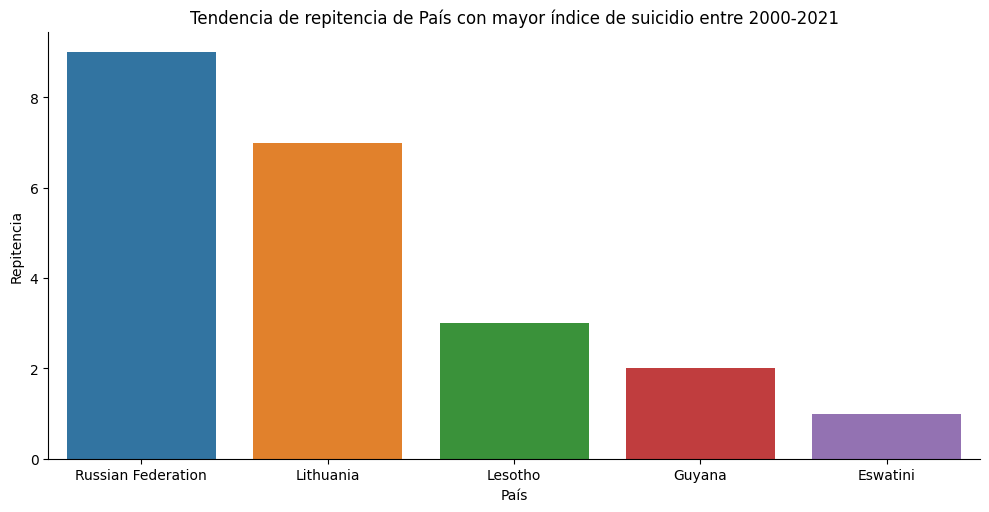

In [10]:
# Ordenamos por índice de conteo
order = max_rate_country['Country Name'].value_counts().index

# Cantidad de repitencia entre años
sns.catplot(data=max_rate_country,x='Country Name', kind='count', height=5, aspect=2, order=order)
plt.xlabel('País')
plt.ylabel('Repitencia')
plt.title('Tendencia de repitencia de País con mayor índice de suicidio entre 2000-2021')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


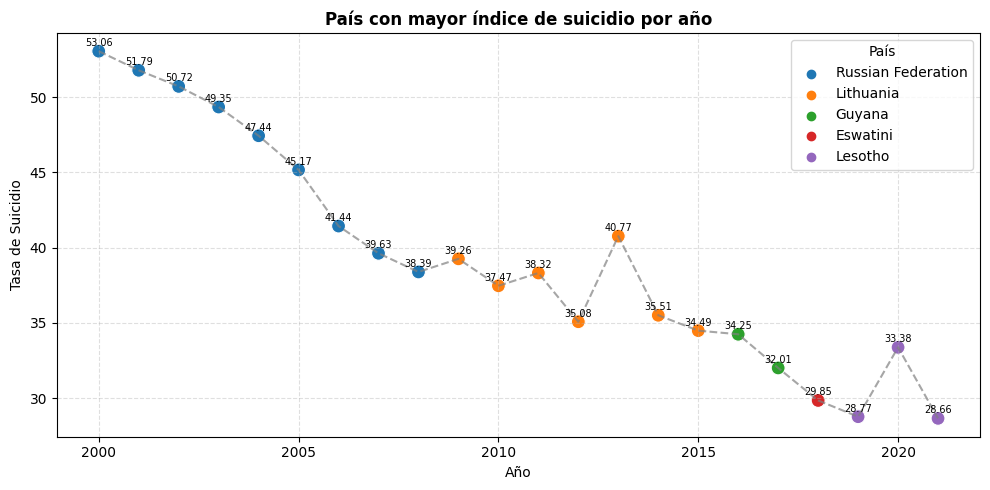

In [11]:
# Definición de tamaño de figura
plt.figure(figsize=(10,5))

# Línea general
sns.lineplot(data=max_rate_country, x='Year', y='Suicide Rate', color='gray', linestyle='--', alpha=0.7)

# Puntos con colores por país
sns.scatterplot(data=max_rate_country, x='Year', y='Suicide Rate', hue='Country Name', s=100)

# Etiquetas encima de los puntos
for i in range(len(max_rate_country)):
    plt.text(
        x=max_rate_country['Year'].iloc[i],
        y=max_rate_country['Suicide Rate'].iloc[i] + 0.2,  # separación vertical
        s=round(max_rate_country['Suicide Rate'].iloc[i], 2),
        ha='center',
        va='bottom',
        fontsize=7
    )

plt.title('País con mayor índice de suicidio por año', fontsize=12, weight='bold')
plt.xlabel('Año')
plt.ylabel('Tasa de Suicidio')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='País')
plt.tight_layout()
plt.show()

# **Conclusiones**

* El país con mayor repitencia entre los años 2000-2021 con un mayor índice de suicidio es Rusia durante los años 2000-2008.
* Durante estos años, también Rusia es el país que obtiene el mayor porcentaje de suicidios, con un 53.06% de su población que se suicidaba en el año 2000.
* Durante los años va disminuyendo el índice, sin embargo, tenemos algunos picos como en el año 2013, en Lithuania con un 40.77% de suicidios, similar en el año 2020, aumentando a 33.38% en Lesotho. ¿Influirán otros factores sociales en este índice de suicidios, como la pandemia del COVID-19?